In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

%matplotlib inline


In [200]:
pd.set_option('display.max_rows', 500)

In [201]:
df = pd.read_csv("D:\Programming\ML_Learnings\csv's\quikr_car.csv")
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [202]:
df.shape

(892, 6)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


Year should be of type int64

In [204]:
df.isna().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [205]:
print(df['name'].nunique())

525


In [206]:
df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

year column will require majority cleaning

### Creating backup

In [207]:
backup = df.copy()

### Cleaning

In [208]:
#extracting year in string format then fillin Nan with 0 and then conevrting it to int

df['year']=df['year'].str.extract(('(\d{4})')).fillna(0).astype(int)
print(df['year'].dtype)
df['year'].unique()

int32


array([2007, 2006, 2018, 2014, 2015, 2012, 2013, 2016, 2010, 2017, 2008,
       2011, 2019, 2009, 2005, 2000,    0, 2003, 2004, 1995, 2002, 2001])

In [209]:
#cleaning price column

#price column has 'Ask For Price' written in it
#we will remove these rows
#also we will remove the ₹ sign and commas from the price and convert it to integer
df['Price'] = df['Price'].replace('Ask For Price',np.nan)
df['Price'] = df['Price'].str.replace('₹','').str.replace(',','').fillna(0).astype(int)


In [210]:
df['kms_driven'].unique()

# we have kms at the end 
# 52 Nan values
#one string value 'Petrol'
# commas in the values

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [211]:
#remmoving kms at the end and filling it with 0 
df['kms_driven'] = df['kms_driven'].replace('Petrol',np.nan).fillna('0')
df['kms_driven'] = df['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

In [212]:
df['kms_driven'] = df['kms_driven'].astype(int)
df['kms_driven'].nunique()

255

In [213]:
df['fuel_type'].unique()
#we dont need rows with nan values

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [214]:
df = df[~df['fuel_type'].isna()]
df.shape

(837, 6)

In [215]:
# car names are very inconsistent 
# we will use first 3 words of the name to identify the car
df['name'] = df['name'].str.split(' ').str.slice(0,3).str.join(' ')
df['name'].unique()

array(['Hyundai Santro Xing', 'Mahindra Jeep CL550', 'Maruti Suzuki Alto',
       'Hyundai Grand i10', 'Ford EcoSport Titanium', 'Ford Figo',
       'Hyundai Eon', 'Ford EcoSport Ambiente', 'Skoda Fabia Classic',
       'Maruti Suzuki Stingray', 'Hyundai Elite i20',
       'Mahindra Scorpio SLE', 'Audi A8', 'Audi Q7',
       'Mahindra Scorpio S10', 'Hyundai i20 Sportz',
       'Maruti Suzuki Vitara', 'Mahindra Bolero DI',
       'Maruti Suzuki Swift', 'Maruti Suzuki Wagon', 'Toyota Innova 2.0',
       'Renault Lodgy 85', 'Skoda Yeti Ambition', 'Maruti Suzuki Baleno',
       'Renault Duster 110', 'Renault Duster 85', 'Honda City 1.5',
       'Maruti Suzuki Dzire', 'Honda Amaze', 'Honda Amaze 1.5',
       'Honda City', 'Datsun Redi GO', 'Maruti Suzuki SX4',
       'Mitsubishi Pajero Sport', 'Honda City ZX', 'Tata Indigo eCS',
       'Volkswagen Polo Highline', 'Chevrolet Spark LS',
       'Renault Duster 110PS', 'Mini Cooper S', 'Skoda Fabia 1.2L',
       'Renault Duster', 'Mahindra Scor

In [216]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Maruti Suzuki Alto,Maruti,2018,0,22000,Petrol
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        837 non-null    object
 1   company     837 non-null    object
 2   year        837 non-null    int32 
 3   Price       837 non-null    int32 
 4   kms_driven  837 non-null    int32 
 5   fuel_type   837 non-null    object
dtypes: int32(3), object(3)
memory usage: 36.0+ KB


In [219]:
df.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,837,837,837.000000,8.370000e+02,837.000000,837
unique,258,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,52,229,NaN,NaN,NaN,440
mean,NaN,NaN,2012.513740,4.013878e+05,46034.457587,NaN
std,NaN,NaN,4.028174,4.735815e+05,34483.283332,NaN
min,NaN,NaN,1995.000000,0.000000e+00,0.000000,NaN
25%,NaN,NaN,2010.000000,1.620000e+05,25000.000000,NaN
50%,NaN,NaN,2013.000000,2.900000e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.899990e+05,56450.000000,NaN


<Axes: xlabel='Price'>

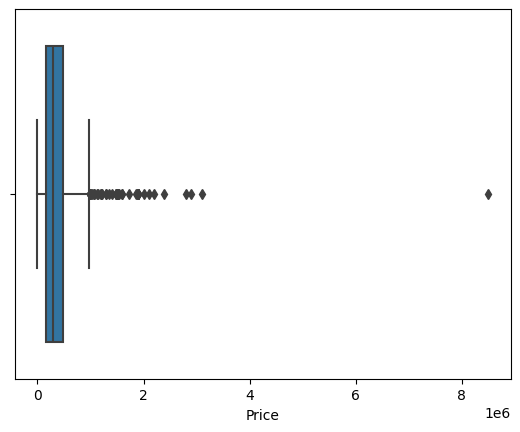

In [226]:
#outlier in price 
sns.boxplot(x=df['Price'])

In [227]:
df = df[df['Price']<6000000]

In [228]:
df.to_csv('cleaned_car_data.csv',index=False)

In [220]:
df['year'].value_counts()

year
2015    117
2013     94
2014     92
2016     76
2012     75
2011     60
2009     55
2017     54
2010     44
2018     34
2006     22
2019     22
2007     19
2008     16
2005     13
2003     13
2004     12
2000      7
2002      5
2001      5
1995      2
Name: count, dtype: int64

c:\Users\aarad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


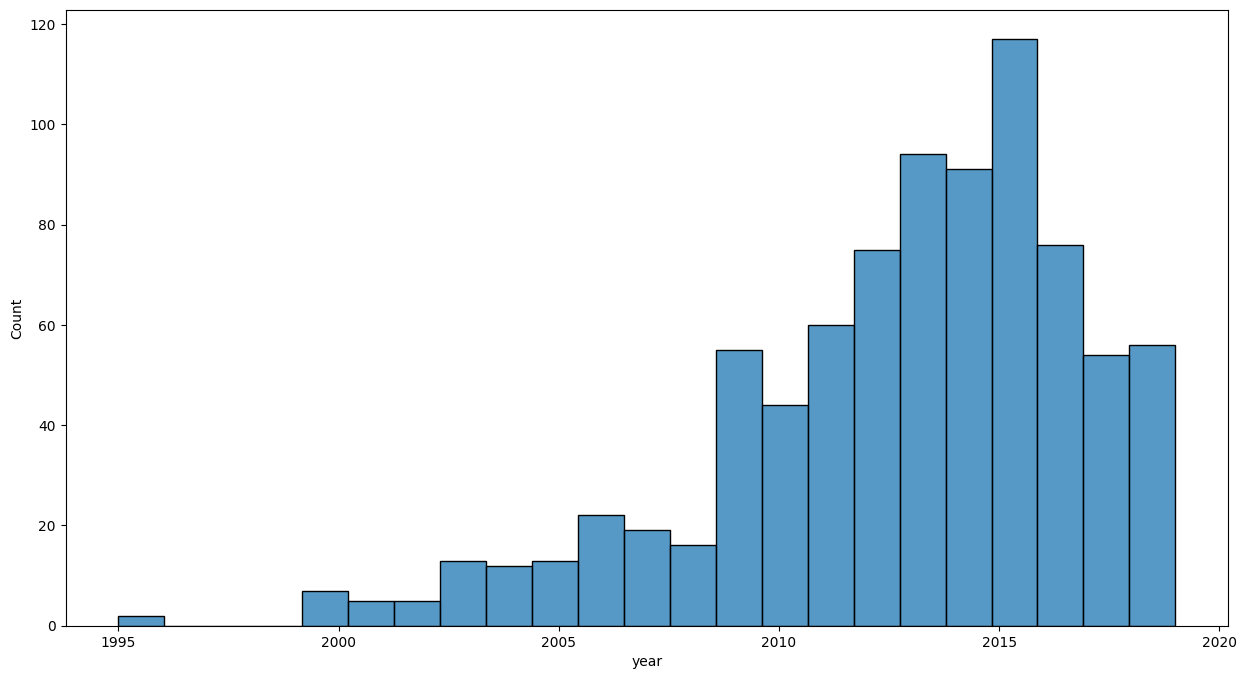

In [230]:
#plotting year vs sales count
plt.figure(figsize=(15,8))
sns.histplot(df['year'])
plt.show()

In [229]:
df[df['year']>2010]



,name,company,year,Price,kms_driven,fuel_type
2,Maruti Suzuki Alto,Maruti,2018,0,22000,Petrol
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
5,Ford EcoSport Titanium,Ford,2015,0,59000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
876,Maruti Suzuki Dzire,Maruti,2016,450000,2500,Diesel
882,Maruti Suzuki Alto,Maruti,2015,0,70000,Petrol
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [231]:
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

Company x Price

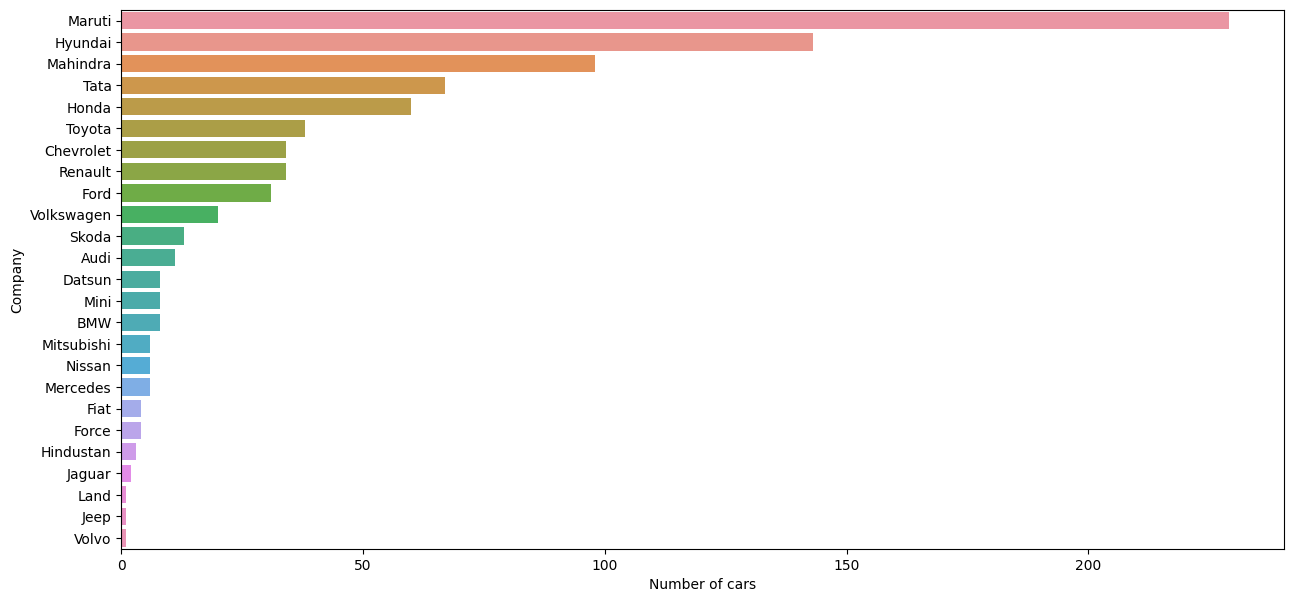

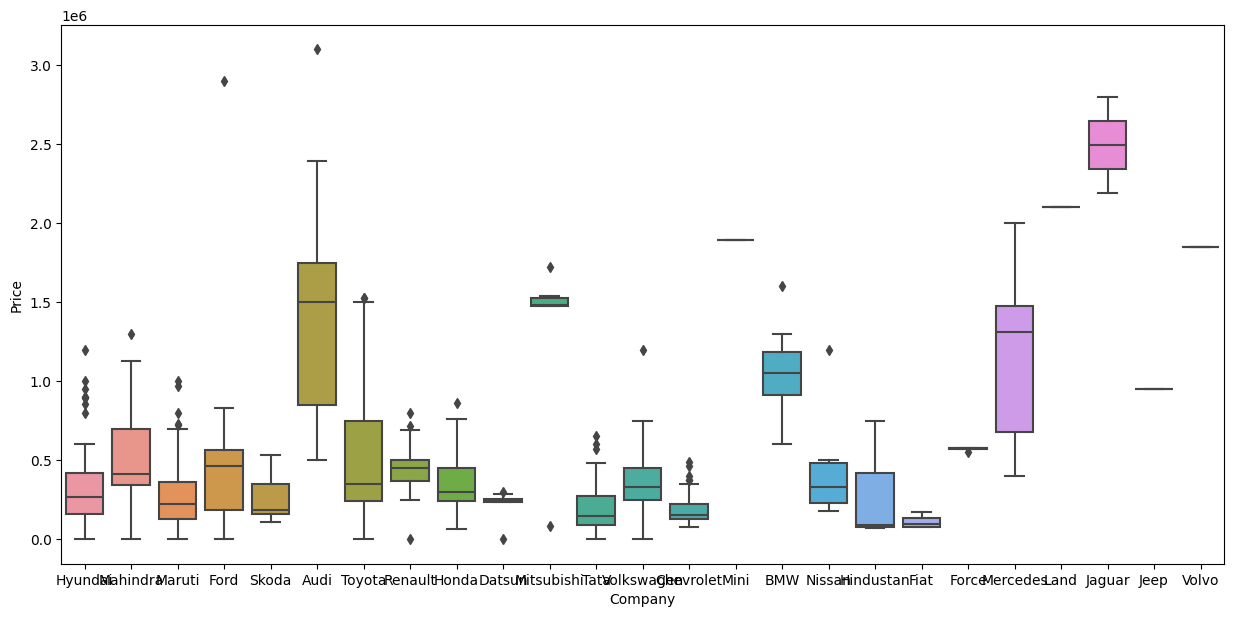

In [233]:
import seaborn as sns

plt.subplots(figsize=(15,7))

# Count plot
ax = sns.countplot(y='company', data=df, order=df['company'].value_counts().index)
ax.set(xlabel='Number of cars', ylabel='Company')

# Boxplot
plt.figure(figsize=(15,7))
sns.boxplot(x='company', y='Price', data=df)
plt.xlabel('Company')
plt.ylabel('Price')

plt.show()

Fuel Type x Price

<Axes: xlabel='fuel_type', ylabel='Price'>

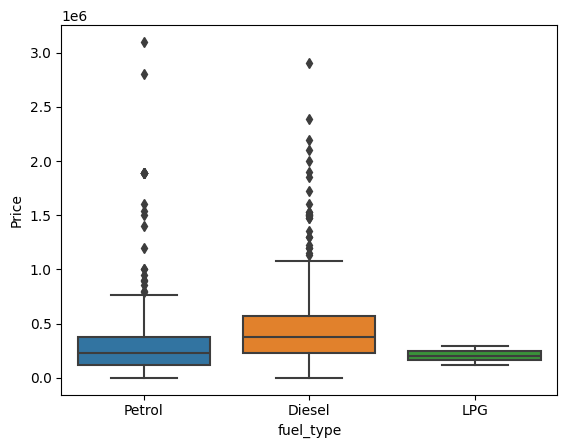

In [236]:
sns.boxplot(x='fuel_type',y='Price',data=df)

kms_driven x Price

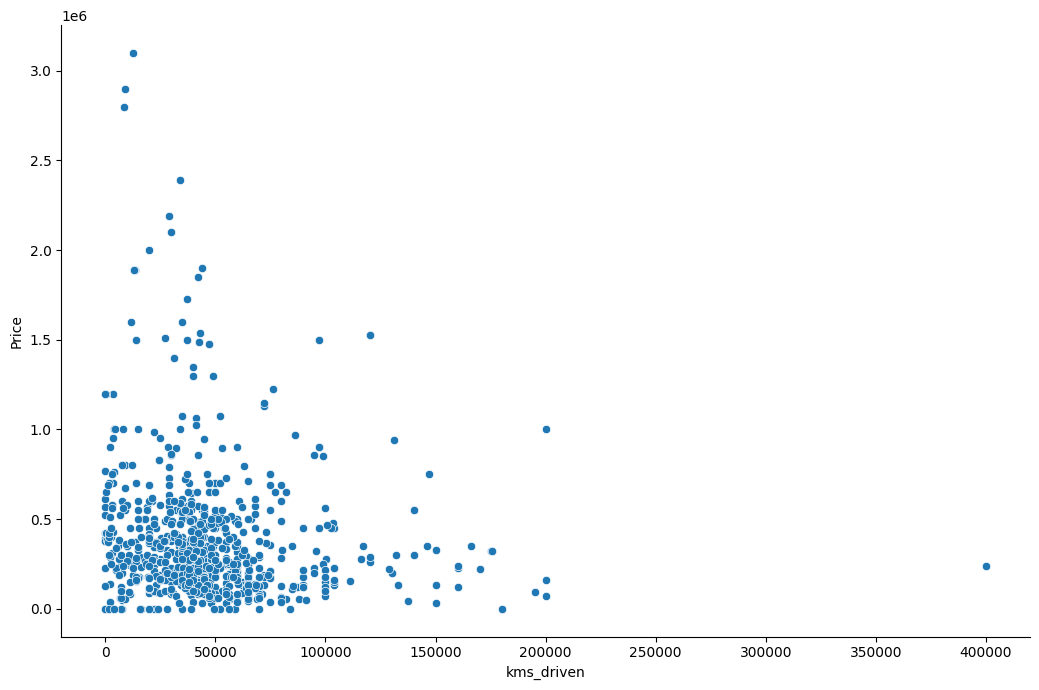

In [235]:
sns.relplot(x='kms_driven',y='Price',data=df,height=7,aspect=1.5)

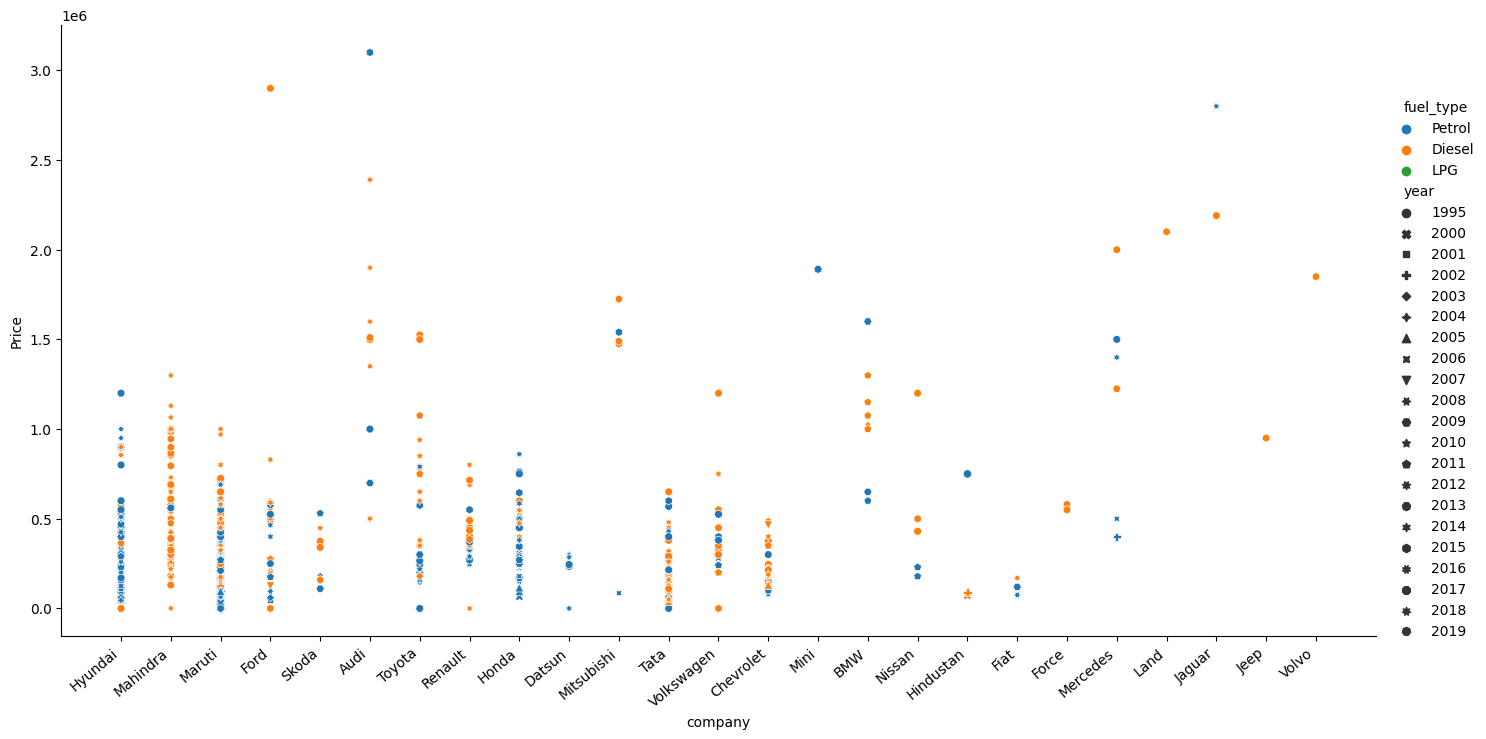

In [241]:

ax=sns.relplot(x='company',y='Price',data=df,hue='fuel_type',style='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

## Model

In [260]:
car = pd.read_csv('cleaned_car_data.csv')

In [261]:
x = car.drop(columns='Price')
y = car['Price']

In [262]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline


In [263]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print("x_train shape: ",x_train.shape)
print("x_test shape: ",x_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

x_train shape:  (668, 5)
x_test shape:  (168, 5)
y_train shape:  (668,)
y_test shape:  (168,)


In [264]:
ohe = OneHotEncoder()
ohe.fit(x[['name','company','fuel_type']])

OneHotEncoder()

In [265]:
col_t = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),remainder='passthrough')

In [266]:
lr = LinearRegression()

In [267]:
pipe = make_pipeline(col_t,lr)

In [268]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [269]:
y_pred = pipe.predict(x_test)

In [270]:
r2_score(y_test,y_pred)
#not so good r2 score

0.7264486242452598

r2_score = 0.7264486242452598 is not that good
lets find a random state which gives better results

In [271]:
best_r2 = -1
best_state = -1

for i in range(3000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=i)
    
    pipe.fit(x_train, y_train)
    predictions = pipe.predict(x_test)
    r2 = r2_score(y_test, predictions)
    
    if r2 > best_r2:
        best_r2 = r2
        best_state = i

print(f"Best random state: {best_state}")
print(f"Best R2 score: {best_r2}")

Best random state: 841
Best R2 score: 0.889529622286481
